In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.width', 200)
df_mergedUS = pd.read_csv('df_mergedUS.csv')
df_mergedUK = pd.read_csv('df_mergedUK.csv')

In [2]:
df_mergedUS.head()

,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
0,4.562353,1.305474,8.910000,5.466667
1,4.847178,0.584260,9.100000,5.466667
2,4.346052,1.323657,8.956667,5.333333
3,4.518577,1.011264,9.206667,5.200000
4,6.414052,0.760203,8.773333,5.233333


In [3]:
df_mergedUS.corr()

,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
Annual Inflation Rate,1.000000,0.295871,0.239073,-0.244145
Quarterly GDP Change,0.295871,1.000000,0.083922,-0.215855
Interest Rate Quarterly,0.239073,0.083922,1.000000,-0.123764
Unemployment Rate Quarterly,-0.244145,-0.215855,-0.123764,1.000000


In [4]:
df_mergedUK.head()

,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
0,7.614098,2.480186,8.88,8.7
1,3.219333,3.007100,11.88,8.4
2,4.516820,2.917238,12.88,8.0
3,4.205032,2.489297,12.88,7.6
4,8.791563,1.760053,13.75,7.2


In [5]:
df_mergedUK.corr()

,Annual Inflation Rate,Quarterly GDP Change,Interest Rate Quarterly,Unemployment Rate Quarterly
Annual Inflation Rate,1.000000,0.171440,0.253415,0.068180
Quarterly GDP Change,0.171440,1.000000,0.167079,0.046167
Interest Rate Quarterly,0.253415,0.167079,1.000000,0.375955
Unemployment Rate Quarterly,0.068180,0.046167,0.375955,1.000000


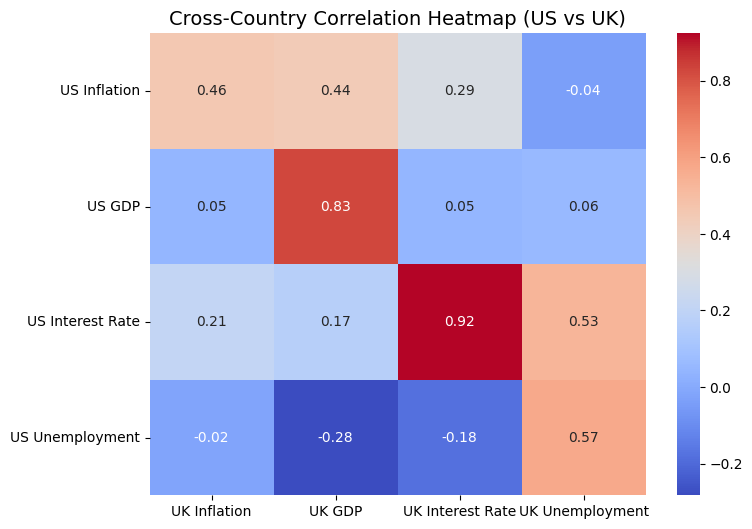

In [8]:
# Rename columns to distinguish between US and UK
df_us = df_mergedUS.rename(columns={
    "Annual Inflation Rate": "US Inflation",
    "Quarterly GDP Change": "US GDP",
    "Interest Rate Quarterly": "US Interest Rate",
    "Unemployment Rate Quarterly": "US Unemployment"
})

df_uk = df_mergedUK.rename(columns={
    "Annual Inflation Rate": "UK Inflation",
    "Quarterly GDP Change": "UK GDP",
    "Interest Rate Quarterly": "UK Interest Rate",
    "Unemployment Rate Quarterly": "UK Unemployment"
})

# Combine the dataframes column-wise
df_combined = pd.concat([df_us.reset_index(drop=True), df_uk.reset_index(drop=True)], axis=1)

# Create the correlation matrix for specific pairs
columns_of_interest = [
    "US Inflation", "UK Inflation",
    "US GDP", "UK GDP",
    "US Interest Rate", "UK Interest Rate",
    "US Unemployment", "UK Unemployment"
]

corr_matrix = df_combined[columns_of_interest].corr().loc[
    ["US Inflation", "US GDP", "US Interest Rate", "US Unemployment"],
    ["UK Inflation", "UK GDP", "UK Interest Rate", "UK Unemployment"]
]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cross-Country Correlation Heatmap (US vs UK)", fontsize=14)
plt.show()


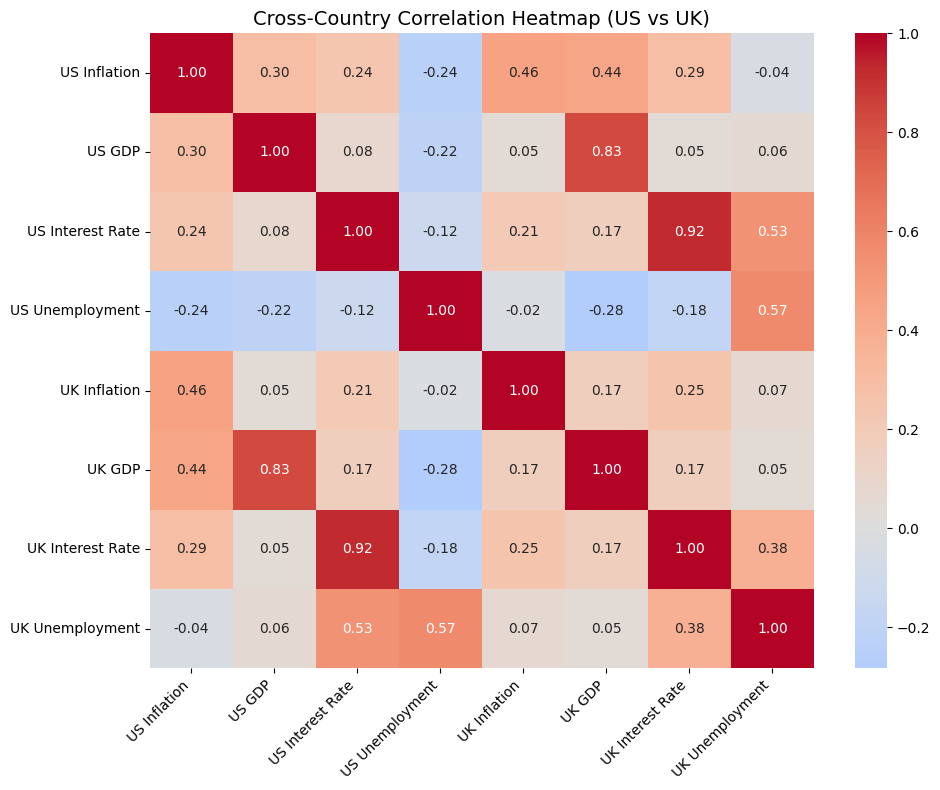

In [9]:
# Compute correlation matrix
corr = df_combined.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")

# Add title
plt.title("Cross-Country Correlation Heatmap (US vs UK)", fontsize=14)

# Rotate axis labels if needed
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()